## All about Random Forest

Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.
Step 2: Individual decision trees are constructed for each sample.
Step 3: Each decision tree will generate an output.
Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

In [4]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


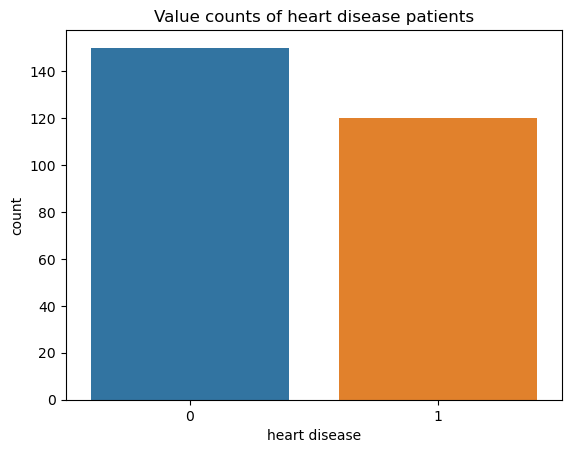

In [5]:
df = pd.read_csv('heart_v2.csv')
print(df.head())
sns.countplot(x = df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [6]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting target variable to y
y = df['heart disease']

## Usual training and testing with 70% training

random_state is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it.

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

## Hyperparameter tuning for Random Forest using GridSearchCV

Grid Search performs multiple computations on the hyperparameters that are available on every machine learning algorithm and provides an ideal set of hyperparameters that help us achieve better results.

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [13]:
classifier_rf.oob_score_

0.656084656084656

In [14]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [15]:
grid_search.best_score_

0.6985815602836879

In [16]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

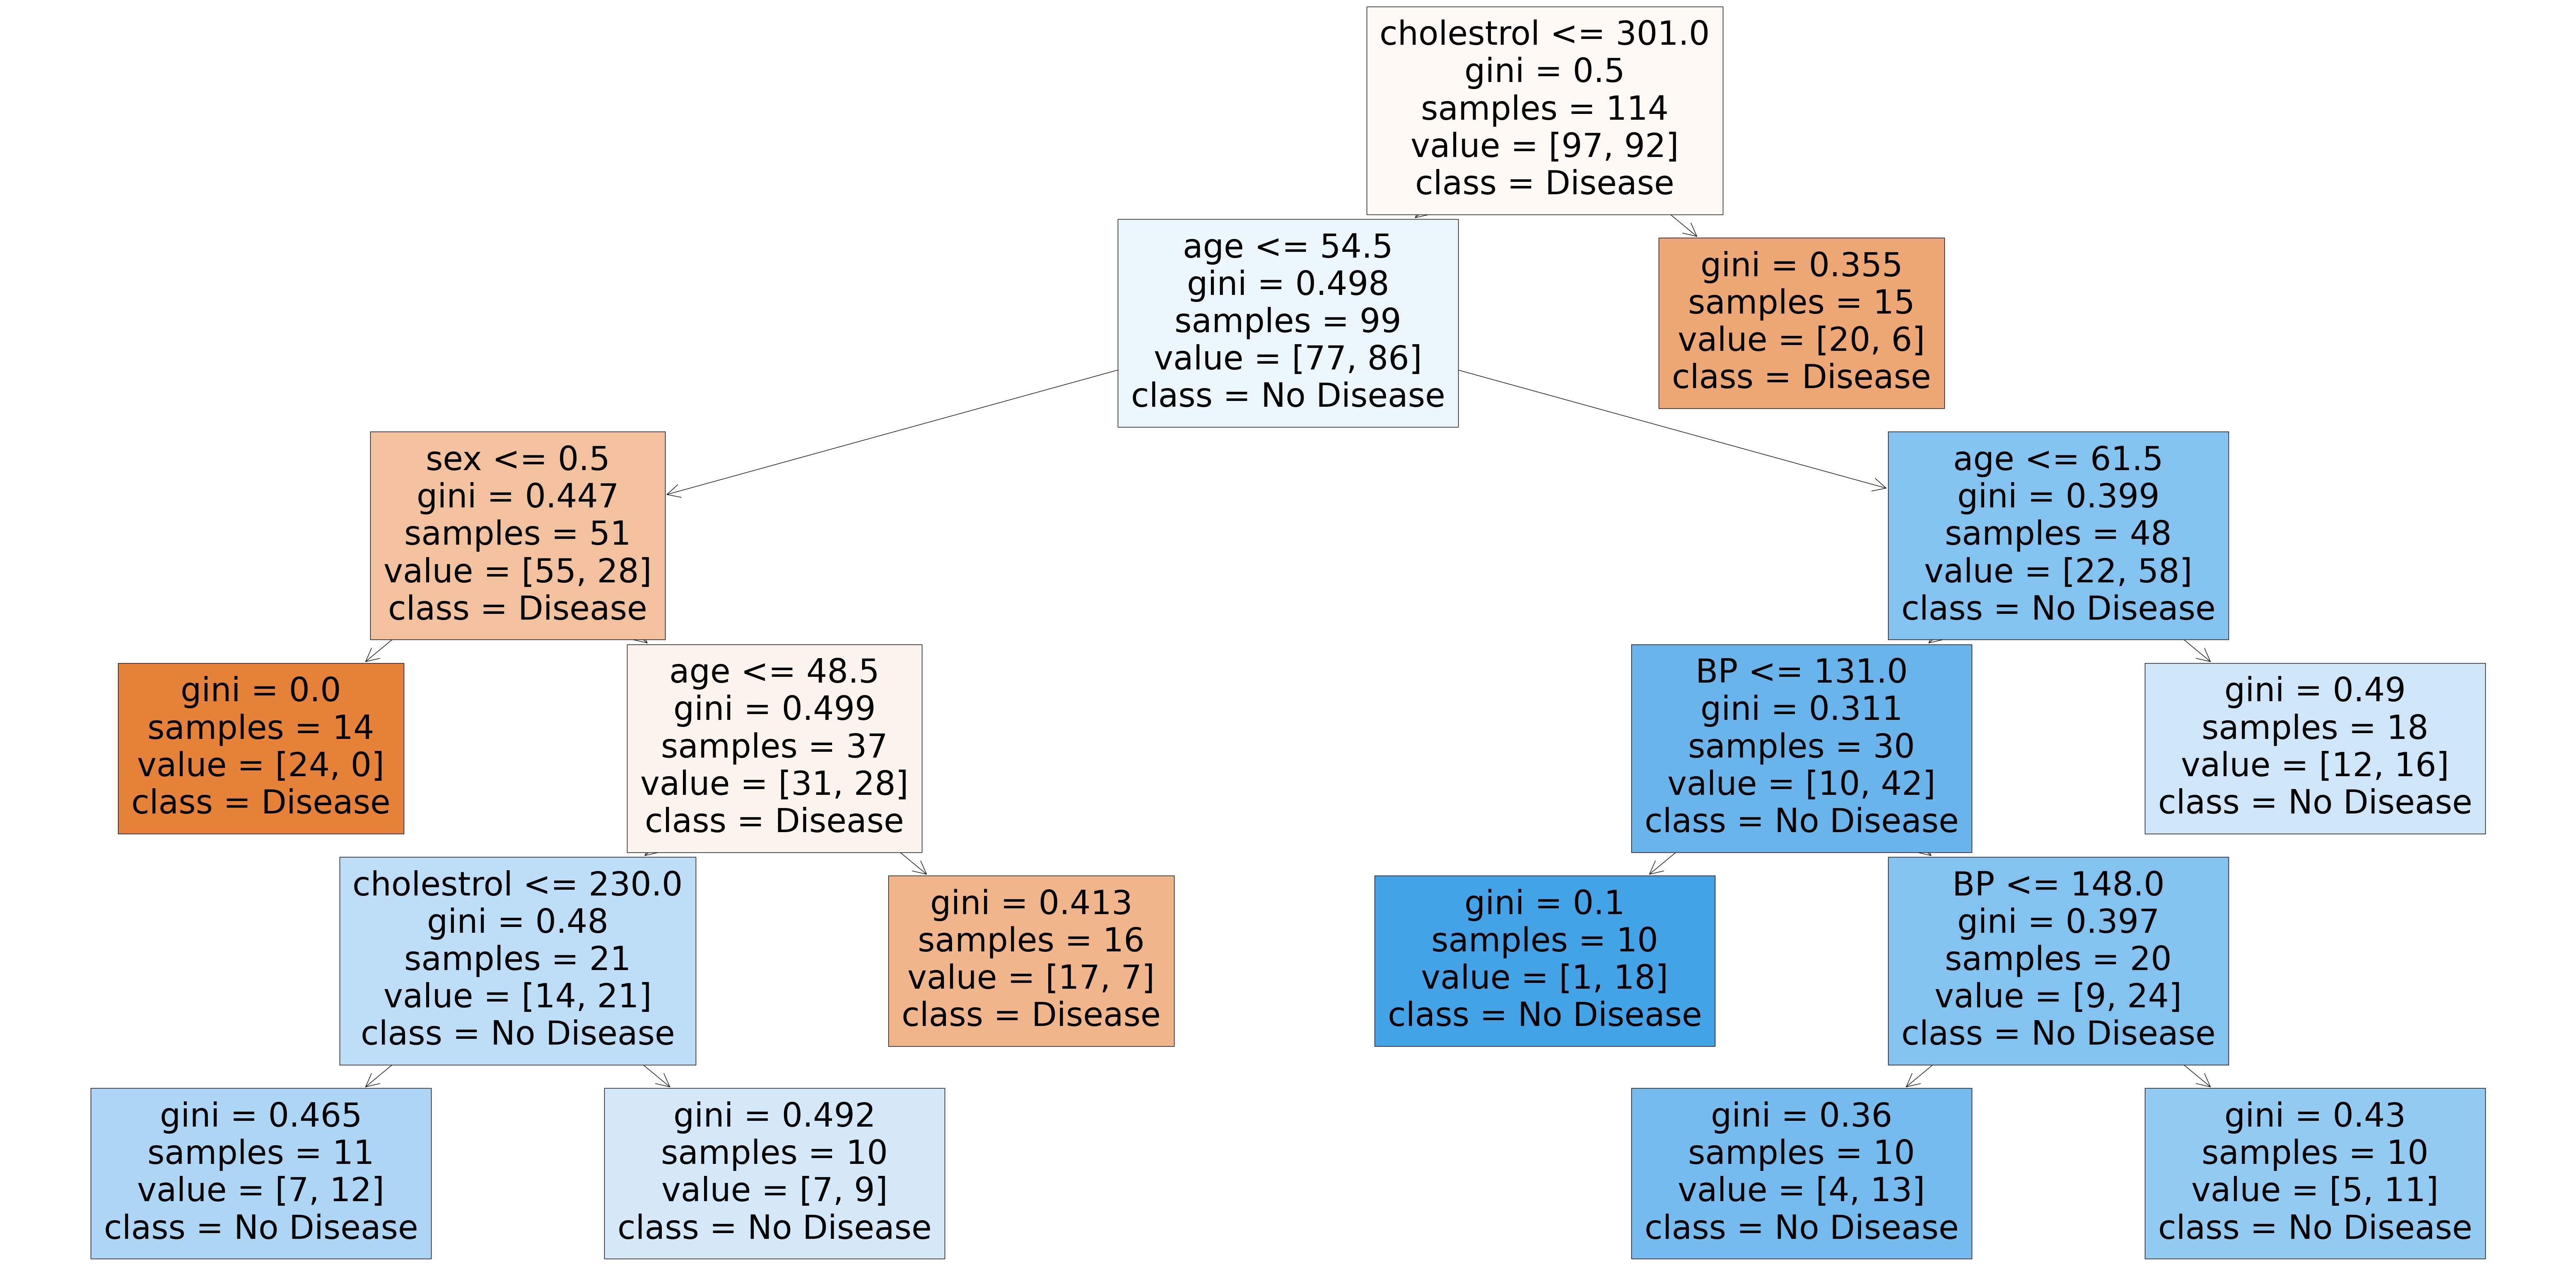

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);